In [1]:
#Add Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2 as pg
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

### Connection to the Postgres database and Retrive data from the tables

In [2]:
#Read Data from the PostgressSql
conn = pg.connect(user = "postgres",
                                  password = "akshaj10",
                                  host = "127.0.0.1",
                                  port = "5432",
                                  database = "movie_data")
sql1 = "Select * From movie_metadata;"
sql2 = "Select * from award;"
movie_df = pd.read_sql_query(sql1, conn)
award_df = pd.read_sql_query(sql2, conn)
conn = None

In [3]:
#Load Data into Pandas Data frame and Display the dataframe.
movie_df.shape

(45006, 13)

In [4]:
#Load Data into Pandas Data frame and Display the dataframe.
award_df.shape

(10395, 4)

In [5]:
#Merge the two dataframe
combined_df = pd.merge(movie_df, award_df,how='left', left_on='title', right_on='film' )
combined_df.shape

(51598, 17)

In [6]:
# Filter all rows for US as the country
movie_us_df = combined_df[combined_df['country'] == 'United States of America'] 
movie_us_df.shape

(22651, 17)

In [7]:
# Find null values
for column in movie_us_df.columns:
    print(f"Column{column} has {movie_us_df[column].isnull().sum()} null values")

Columnimdb_id has 3 null values
Columnbudget has 0 null values
Columnoriginal_title has 0 null values
Columnpopularity has 0 null values
Columnrevenue has 0 null values
Columnruntime has 5 null values
Columntitle has 0 null values
Columnvote_average has 0 null values
Columnvote_count has 0 null values
Columnproduction has 0 null values
Columncountry has 0 null values
Columnnew_genre has 0 null values
ColumnRelease_year has 2 null values
Columnindex has 15911 null values
Columncategory has 15911 null values
Columnfilm has 15911 null values
Columnwinner has 15911 null values


In [8]:
movie_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22651 entries, 0 to 51595
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         22648 non-null  object 
 1   budget          22651 non-null  int64  
 2   original_title  22651 non-null  object 
 3   popularity      22651 non-null  float64
 4   revenue         22651 non-null  float64
 5   runtime         22646 non-null  float64
 6   title           22651 non-null  object 
 7   vote_average    22651 non-null  float64
 8   vote_count      22651 non-null  float64
 9   production      22651 non-null  object 
 10  country         22651 non-null  object 
 11  new_genre       22651 non-null  object 
 12  Release_year    22649 non-null  object 
 13  index           6740 non-null   float64
 14  category        6740 non-null   object 
 15  film            6740 non-null   object 
 16  winner          6740 non-null   object 
dtypes: float64(6), int64(1), object

In [10]:
#Set the index to IMDB_ID
movie_us_df = movie_us_df.set_index("imdb_id")
movie_us_df.head()

,budget,original_title,popularity,revenue,runtime,title,vote_average,vote_count,production,country,new_genre,Release_year,index,category,film,winner
imdb_id,,,,,,,,,,,,,,,,
tt0114709,30000000,Toy Story,30000000.0,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,United States of America,Animation,1995,7508.0,MUSIC (Original Musical or Comedy Score),Toy Story,False
tt0114709,30000000,Toy Story,30000000.0,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,United States of America,Animation,1995,7514.0,MUSIC (Original Song),Toy Story,False
tt0114709,30000000,Toy Story,30000000.0,373554033.0,81.0,Toy Story,7.7,5415.0,Pixar Animation Studios,United States of America,Animation,1995,7548.0,WRITING (Screenplay Written Directly for the S...,Toy Story,False
tt0113497,65000000,Jumanji,65000000.0,262797249.0,104.0,Jumanji,6.9,2413.0,TriStar Pictures,United States of America,Adventure,1995,NaN,NaN,NaN,NaN
tt0113228,0,Grumpier Old Men,0.0,0.0,101.0,Grumpier Old Men,6.5,92.0,Warner Bros.,United States of America,Romance,1995,NaN,NaN,NaN,NaN


In [11]:
columns =['budget','original_title','popularity','revenue','runtime','vote_average','vote_count','production','country','new_genre','Release_year', 'winner']

target = ['winner']

In [12]:
movie_us_df = movie_us_df.loc[:, columns].copy()
movie_us_df.shape

(22651, 12)

In [13]:
#Convert winner column into numbers 
movie_us_df["winner"] = movie_us_df["winner"].replace({True: 1, False: 0})
movie_us_df.shape

(22651, 12)

In [14]:
#Fill null values in winner column to zero 
movie_us_df["winner"] = movie_us_df["winner"].fillna(value=0)
movie_us_df.shape

(22651, 12)

In [15]:
movie_us_df['Release_year']=movie_us_df.popularity.astype('int64')

In [16]:
# Create a title Dataframe.
title_df=pd.DataFrame(data=movie_us_df['original_title'],index=movie_us_df.index,copy=True)
title_df.head()

,original_title
imdb_id,
tt0114709,Toy Story
tt0114709,Toy Story
tt0114709,Toy Story
tt0113497,Jumanji
tt0113228,Grumpier Old Men


In [17]:
# Remove the movie title from the dataframe
movie_us_df = movie_us_df.drop('original_title',1)
movie_us_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,production,country,new_genre,Release_year,winner
imdb_id,,,,,,,,,,,
tt0114709,30000000,30000000.0,373554033.0,81.0,7.7,5415.0,Pixar Animation Studios,United States of America,Animation,30000000,0.0
tt0114709,30000000,30000000.0,373554033.0,81.0,7.7,5415.0,Pixar Animation Studios,United States of America,Animation,30000000,0.0
tt0114709,30000000,30000000.0,373554033.0,81.0,7.7,5415.0,Pixar Animation Studios,United States of America,Animation,30000000,0.0
tt0113497,65000000,65000000.0,262797249.0,104.0,6.9,2413.0,TriStar Pictures,United States of America,Adventure,65000000,0.0
tt0113228,0,0.0,0.0,101.0,6.5,92.0,Warner Bros.,United States of America,Romance,0,0.0


In [18]:
# Drop null rows
movie_us_df = movie_us_df.dropna(axis = 0,how= 'any')
movie_us_df.shape

(22646, 11)

In [19]:
# Generate our categorical variable list for movie dataset
movie_cat = movie_us_df.dtypes[movie_us_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
movie_us_df[movie_cat].nunique()

production    4610
country          1
new_genre       20
dtype: int64

### One Hot encoding production -Using top 10 values

In [20]:
# Check the production unique value counts to see if binning is required
production_counts= movie_us_df.production.value_counts()
production_counts

Other                                     2314
Paramount Pictures                        1374
Metro-Goldwyn-Mayer (MGM)                 1167
Twentieth Century Fox Film Corporation    1125
Warner Bros.                               972
                                          ... 
Eurasia Investments                          1
Cadillac Hash                                1
PGP Productions                              1
Rebel Film BV                                1
Wakeford / Orloff                            1
Name: production, Length: 4610, dtype: int64

In [21]:
# Determine which values to replace for bucketing
replace_production = list(production_counts[production_counts < 42].index)

# Replace in DataFrame
for production in replace_production:
    movie_us_df.production = movie_us_df.production.replace(production,"Other")


# Check to make sure binning was successful
movie_us_df.production.value_counts()

Other                                     12383
Paramount Pictures                         1374
Metro-Goldwyn-Mayer (MGM)                  1167
Twentieth Century Fox Film Corporation     1125
Warner Bros.                                972
Universal Pictures                          820
Columbia Pictures                           530
Columbia Pictures Corporation               480
RKO Radio Pictures                          423
United Artists                              393
Walt Disney Pictures                        287
New Line Cinema                             226
Miramax Films                               210
TriStar Pictures                            177
Orion Pictures                              121
Walt Disney Productions                     106
Touchstone Pictures                         106
Samuel Goldwyn Company, The                 105
DreamWorks SKG                               93
Universal International Pictures (UI)        89
Imagine Entertainment                   

In [22]:
# let's examine how many columns we will obtain after one hot encoding these variables
encode_df=pd.get_dummies(movie_us_df[movie_cat], drop_first=True)
encode_df.shape

(22646, 64)

In [23]:
# Merge one-hot encoded features and drop the originals
oscar_us_df = movie_us_df.merge(encode_df,left_index=True, right_index=True)
oscar_us_df = oscar_us_df.drop(movie_cat,1)
oscar_us_df.head(2)

,budget,popularity,revenue,runtime,vote_average,vote_count,Release_year,winner,production_Amblin Entertainment,production_American International Pictures (AIP),...,new_genre_History,new_genre_Horror,new_genre_Music,new_genre_Mystery,new_genre_Romance,new_genre_Science Fiction,new_genre_TV Movie,new_genre_Thriller,new_genre_War,new_genre_Western
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0000001,0,0.0,0.0,1.0,4.9,18.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0000005,0,0.0,0.0,1.0,5.8,19.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Define the features set.
X = oscar_us_df.copy()
X = X.drop('winner', axis=1)
X.shape

(52646, 71)

In [25]:
# Define the target set(output label)
y = oscar_us_df['winner']
y.head(2)

imdb_id
tt0000001    0.0
tt0000005    0.0
Name: winner, dtype: float64

In [26]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [27]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39484, 71)
(13162, 71)
(39484,)
(13162,)


In [28]:
# Creating the logistic Regression classifier instance.
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=78)
# Fitting the model.
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=78, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Making predictions using the testing data.
y_pred = classifier.predict(X_test)
#results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
#results.head(20)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

cm_df

,Predicted 0,Predicted 1
Actual 0,9506,1248
Actual 1,1987,421


In [31]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7542166843944689

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,9506,1248
Actual 1,1987,421


Accuracy Score : 0.7542166843944689
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85     10754
         1.0       0.25      0.17      0.21      2408

    accuracy                           0.75     13162
   macro avg       0.54      0.53      0.53     13162
weighted avg       0.72      0.75      0.74     13162



### Feature Selection using Corelation heatmap

In [33]:
oscar_us_df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,Release_year,winner,production_Amblin Entertainment,production_American International Pictures (AIP),...,new_genre_History,new_genre_Horror,new_genre_Music,new_genre_Mystery,new_genre_Romance,new_genre_Science Fiction,new_genre_TV Movie,new_genre_Thriller,new_genre_War,new_genre_Western
budget,1.000000,1.000000,0.761933,0.274720,0.167806,0.658345,1.000000,0.096152,0.055174,-0.013002,...,0.014867,-0.052472,-0.042352,-0.020906,-0.014464,0.011317,-0.031797,0.001753,-0.018725,-0.007495
popularity,1.000000,1.000000,0.761933,0.274720,0.167806,0.658345,1.000000,0.096152,0.055174,-0.013002,...,0.014867,-0.052472,-0.042352,-0.020906,-0.014464,0.011317,-0.031797,0.001753,-0.018725,-0.007495
revenue,0.761933,0.761933,1.000000,0.261142,0.209732,0.811116,0.761933,0.148524,0.040599,-0.010272,...,-0.005594,-0.044216,-0.037616,-0.000760,0.013208,0.013445,-0.025760,-0.015238,-0.008595,-0.027762
runtime,0.274720,0.274720,0.261142,1.000000,0.300183,0.252886,0.274720,0.193242,0.047796,-0.025953,...,0.043067,-0.132863,-0.039862,-0.042704,-0.022832,-0.024189,-0.026527,-0.051049,0.019981,-0.018390
vote_average,0.167806,0.167806,0.209732,0.300183,1.000000,0.301972,0.167806,0.150742,0.047509,-0.015018,...,0.016867,-0.135864,-0.038298,0.002183,-0.030059,-0.028297,-0.058068,-0.052602,0.010474,-0.030881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
new_genre_Science Fiction,0.011317,0.011317,0.013445,-0.024189,-0.028297,0.015403,0.011317,-0.029391,-0.006508,0.003496,...,-0.008240,-0.016106,-0.011061,-0.008929,-0.013367,1.000000,-0.007264,-0.014239,-0.009125,-0.011633
new_genre_TV Movie,-0.031797,-0.031797,-0.025760,-0.026527,-0.058068,-0.029543,-0.031797,-0.012606,-0.005411,-0.002467,...,-0.006851,-0.013390,-0.009195,-0.007423,-0.011112,-0.007264,1.000000,-0.011838,-0.007586,-0.009671
new_genre_Thriller,0.001753,0.001753,-0.015238,-0.051049,-0.052602,0.040049,0.001753,-0.041073,-0.010607,0.007233,...,-0.013430,-0.026249,-0.018026,-0.014551,-0.021784,-0.014239,-0.011838,1.000000,-0.014872,-0.018959
new_genre_War,-0.018725,-0.018725,-0.008595,0.019981,0.010474,-0.010020,-0.018725,0.045245,-0.006797,-0.003099,...,-0.008606,-0.016821,-0.011552,-0.009325,-0.013960,-0.009125,-0.007586,-0.014872,1.000000,-0.012150


In [34]:
encode_df.corr()

,production_Amblin Entertainment,production_American International Pictures (AIP),production_Castle Rock Entertainment,production_Columbia Pictures,production_Columbia Pictures Corporation,production_DC Comics,production_DreamWorks SKG,production_Edison Manufacturing Company,production_First National Pictures,production_Fox Film Corporation,...,new_genre_History,new_genre_Horror,new_genre_Music,new_genre_Mystery,new_genre_Romance,new_genre_Science Fiction,new_genre_TV Movie,new_genre_Thriller,new_genre_War,new_genre_Western
production_Amblin Entertainment,1.000000,-0.002278,-0.002099,-0.007282,-0.006922,-0.002257,-0.003021,-0.002052,-0.002712,-0.002675,...,-0.003490,-0.011937,-0.005623,-0.005320,-0.007075,-0.005720,-0.004786,-0.008512,-0.003930,-0.006021
production_American International Pictures (AIP),-0.002278,1.000000,-0.002161,-0.007498,-0.007127,-0.002324,-0.003110,-0.002113,-0.002792,-0.002754,...,-0.003594,0.033708,-0.005789,-0.005478,-0.007285,0.001736,-0.004928,0.006883,-0.004047,-0.006199
production_Castle Rock Entertainment,-0.002099,-0.002161,1.000000,-0.006908,-0.006566,-0.002141,-0.002865,-0.001946,-0.002572,-0.002538,...,-0.003311,-0.011323,-0.005334,-0.005046,0.013513,-0.005426,-0.004540,-0.008074,-0.003728,-0.005711
production_Columbia Pictures,-0.007282,-0.007498,-0.006908,1.000000,-0.022780,-0.007427,-0.009941,-0.006752,-0.008924,-0.008803,...,0.000388,-0.028256,-0.011068,-0.007045,-0.001440,-0.011513,-0.015750,0.005328,-0.009414,-0.003577
production_Columbia Pictures Corporation,-0.006922,-0.007127,-0.006566,-0.022780,1.000000,-0.007060,-0.009450,-0.006418,-0.008483,-0.008368,...,-0.010919,-0.020624,0.031838,0.002575,-0.005459,0.012806,-0.014971,-0.003882,0.050516,0.037159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
new_genre_Science Fiction,-0.005720,0.001736,-0.005426,-0.011513,0.012806,0.009564,0.009478,-0.005304,-0.007010,-0.006915,...,-0.009023,-0.030858,-0.014535,-0.013753,-0.018291,1.000000,-0.012372,-0.022004,-0.010160,-0.015564
new_genre_TV Movie,-0.004786,-0.004928,-0.004540,-0.015750,-0.014971,-0.004881,-0.006533,-0.004437,-0.005865,-0.005786,...,-0.007549,-0.025817,-0.012161,-0.011506,-0.015303,-0.012372,1.000000,-0.018410,-0.008501,-0.013022
new_genre_Thriller,-0.008512,0.006883,-0.008074,0.005328,-0.003882,-0.008681,0.015966,-0.007892,0.002729,-0.001398,...,-0.013427,-0.045917,-0.021629,-0.020465,-0.027217,-0.022004,-0.018410,1.000000,-0.015119,-0.023160
new_genre_War,-0.003930,-0.004047,-0.003728,-0.009414,0.050516,-0.004008,0.011278,-0.003644,0.004447,0.051580,...,-0.006200,-0.021202,-0.009987,-0.009450,-0.012567,-0.010160,-0.008501,-0.015119,1.000000,-0.010694


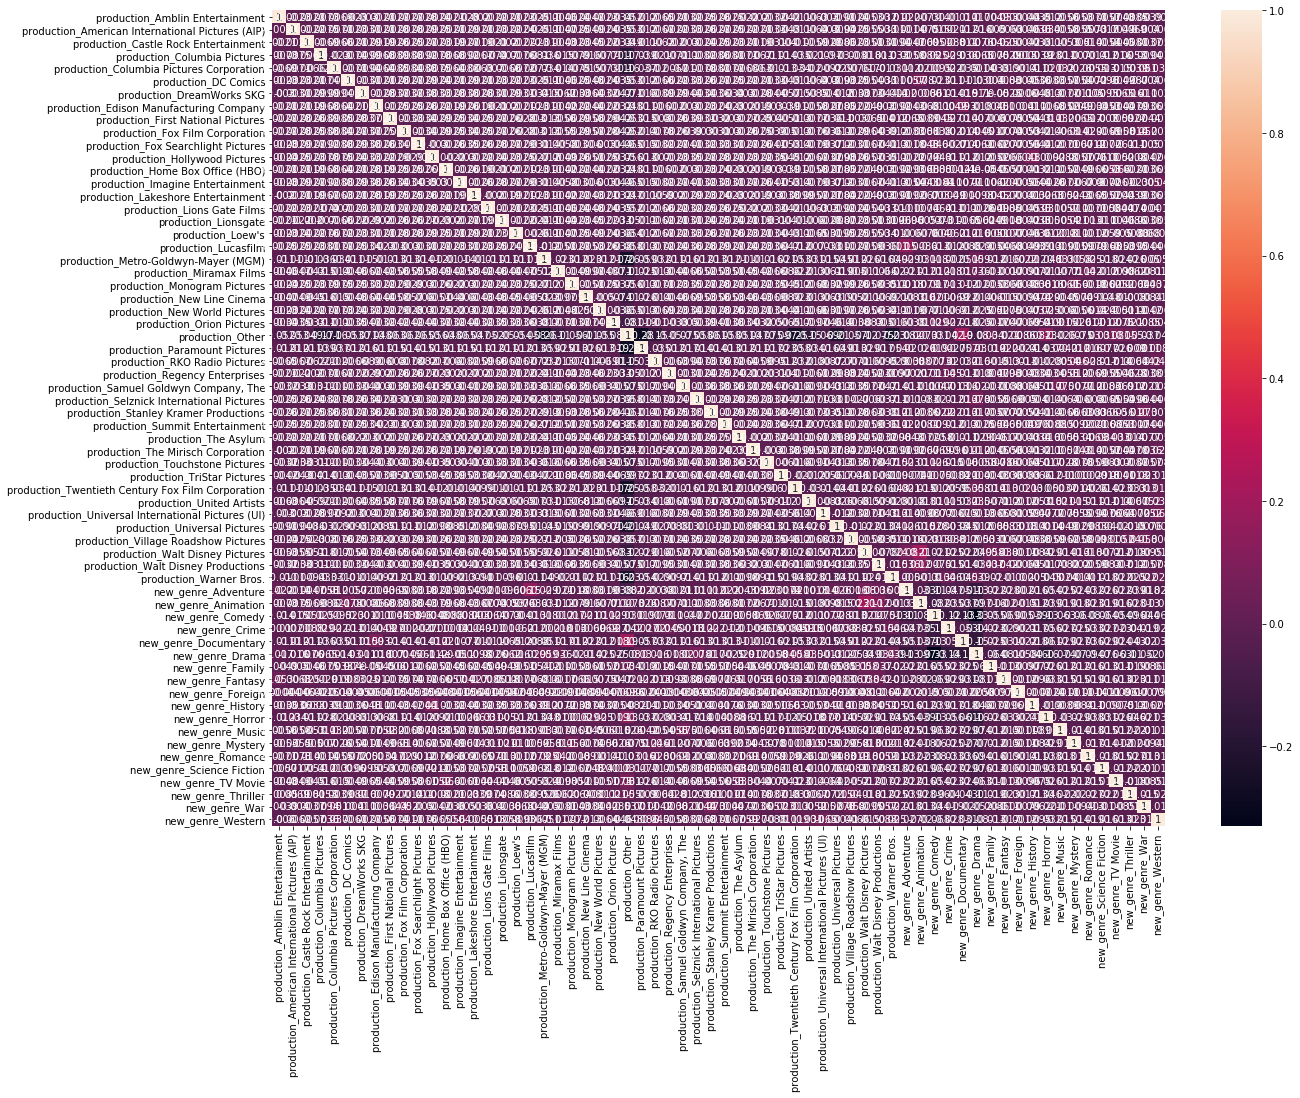

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(encode_df.corr(),annot= True)
plt.show()


In [ ]:
ax = sns.heatmap(encode_df.corr(),annot= True)

In [ ]:
ax1 = sns.heatmap(oscar_us_df, vmin=0.8, vmax=2)